# Comparison of Nalu-Wind vs AMR-wind spectra
## Spectra, stable 5m/s case

In [1]:
%%capture
# Important header information
naluhelperdir = '../utilities/'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import windspectra
from matplotlib.lines import Line2D
import yaml
%matplotlib inline
# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

## List of runs to compare

In [2]:
# Locations of all of the runs
baserundir = '../../'
NumReqCols = 3   # Number of required columns in the table

# Index of all runs here
runlist=[
    # Name,                     Location,                                       file, style dict
    # -- NaluWind runs --
    ['Nalu-Wind 5m/s',    'NaluWindRuns/stable/05ms/05ms_Good_Mesh_2p5m/', 'NaluWind_Stable05_spectra_dx02.5_z20.dat',  {'z':20, 'U':5, 'dx':2.5,  'color':'b', 'lw':1.25, 'lstyle':'-.'}],
    # -- AMRWind runs --
    ['AMR-Wind 5m/s',     'AMRWindRuns/stable/05ms/sim_dx2.5/',     'AMRWind_Stable05_spectra_dx02.5_z20.dat',   {'z':20, 'U':5, 'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-'}],
    #['AMR-Wind 5m/s',     'AMRWindRuns/stable/05ms/sim_dx2.5/',     'AMRWind_Stable05_spectra_dx02.5_z40.dat',   {'z':40, 'U':5, 'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'--'}],
    #['AMR-Wind 5m/s',     'AMRWindRuns/stable/05ms/sim_dx2.5/',     'AMRWind_Stable05_spectra_dx02.5_z60.dat',   {'z':60, 'U':5, 'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-.'}],
    
    #['AMR-Wind',          'AMRWindRuns/stable/10ms/sim_dx2.5/',     'AMRWind_Stable10_spectra_dx02.5_z20.dat',   {'z':20, 'U':10,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-'}],
    #['AMR-Wind',          'AMRWindRuns/stable/10ms/sim_dx2.5/',     'AMRWind_Stable10_spectra_dx02.5_z40.dat',   {'z':40, 'U':10,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'--'}],
    #['AMR-Wind',          'AMRWindRuns/stable/10ms/sim_dx2.5/',     'AMRWind_Stable10_spectra_dx02.5_z60.dat',   {'z':60, 'U':10,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-.'}],

    #['AMR-Wind',          'AMRWindRuns/stable/15ms/sim_dx2.5/',     'AMRWind_Stable15_spectra_dx02.5_z20.dat',   {'z':20, 'U':15,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-'}],
    #['AMR-Wind',          'AMRWindRuns/stable/15ms/sim_dx2.5/',     'AMRWind_Stable15_spectra_dx02.5_z40.dat',   {'z':40, 'U':15,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'--'}],
    #['AMR-Wind',          'AMRWindRuns/stable/15ms/sim_dx2.5/',     'AMRWind_Stable15_spectra_dx02.5_z60.dat',   {'z':60, 'U':15,'dx':2.5,'color':'r', 'lw':0.75, 'lstyle':'-.'}],

]

plotKaimal = False
# Stuff for saving figures
savefigs = True
figdir   = '../../Paper/figures/Compare_AMRWind_NaluWind/'
saveprefix = 'AMRWind_NaluWind_Spectra_Stable_'

## Plot spectra

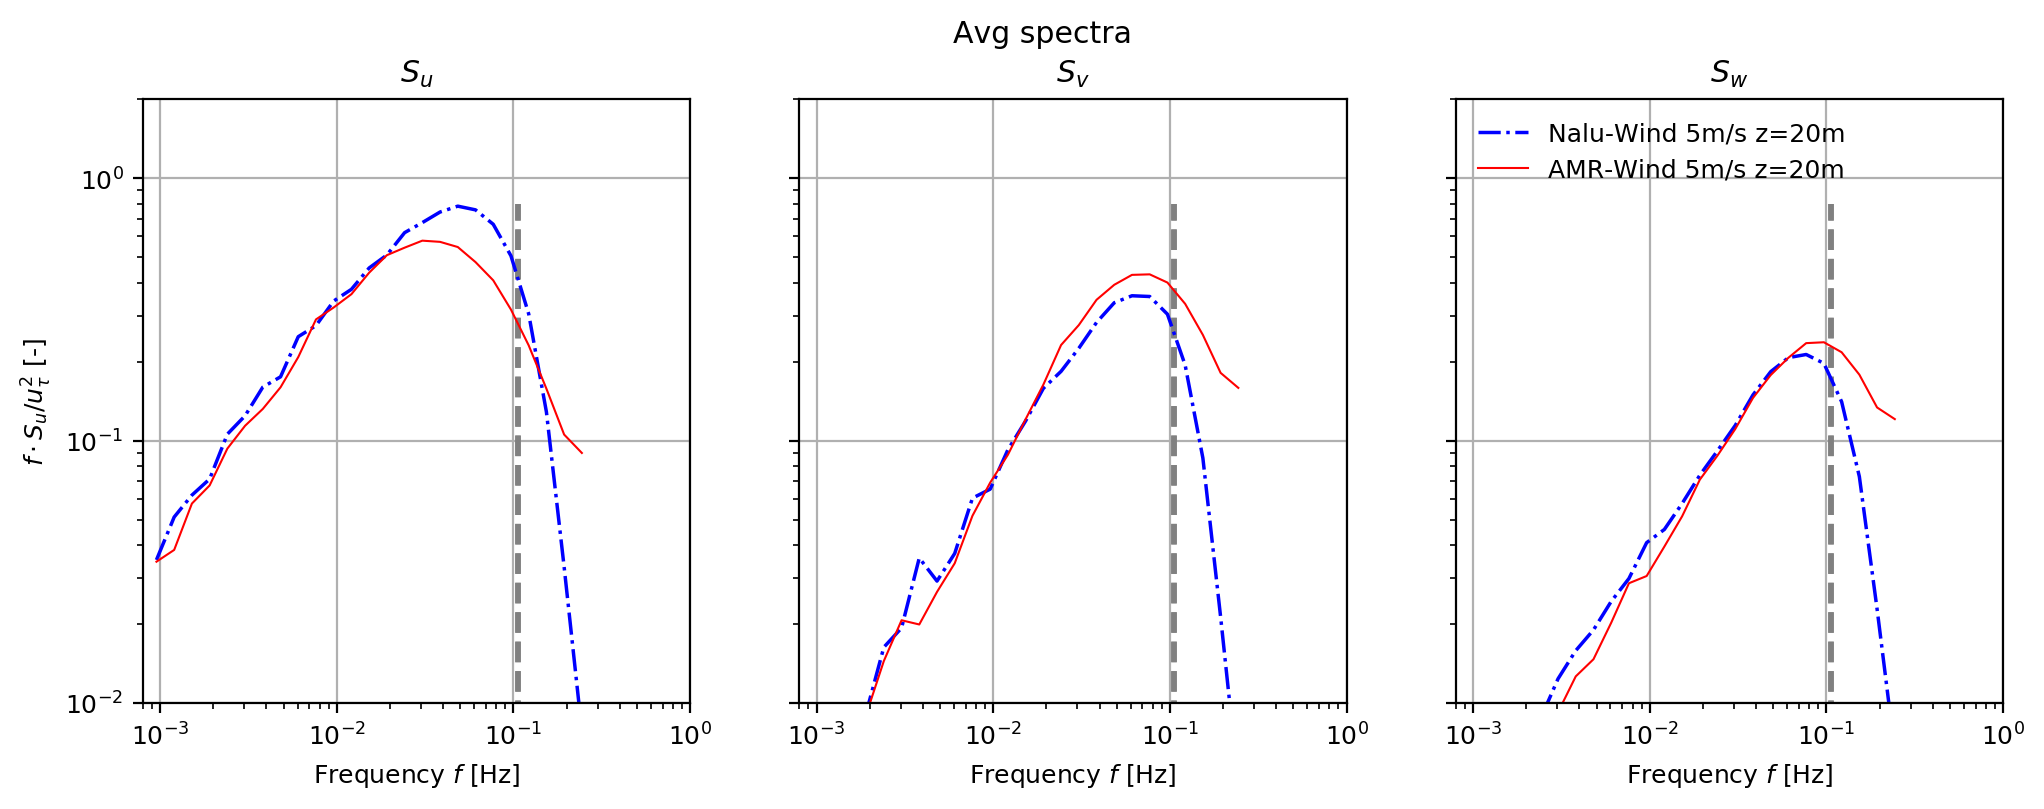

In [3]:
dpi = 200
#plt.figure("u",  figsize=(4,4), dpi=dpi)
#plt.figure("v",  figsize=(4,4), dpi=dpi)
#plt.figure("w",  figsize=(4,4), dpi=dpi)
plt.rc('font', size=9)

Nband = 3 # 1/3 octave band averaging
zpts  = [20]
Usel  = [5]
ylims = [1e-2, 2]
xlims = [8e-4, 1]

for zplot in zpts:
    fig, axs = plt.subplots(1,3,figsize=(12,4),sharey=True, dpi=dpi)
    for Uplot in Usel:
        for irun, run in enumerate(runlist[:]):
            rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
            U        = getparam('U', rundict, -1)
            z        = getparam('z', rundict, -1)
            if (U != Uplot): continue
            if (z != zplot): continue
            pltcolor = getparam('color', rundict, 'b')
            lstyle   = getparam('lstyle', rundict, '-') 
            lw       = getparam('lw', rundict, 1) 
            label    = run[0]
            rundir   = run[1]
            datafile = run[2]
    
            with open(baserundir+'/'+rundir+'/istats.yaml') as file:
                istats = yaml.load(file) #yaml.load(file, Loader=yaml.FullLoader)
                if 'utau' in istats:   utau = istats['utau']
                if 'ustar' in istats:  utau = istats['ustar']
            #print('utau = '+repr(utau))       
    
            spectra  = np.loadtxt(baserundir+'/'+rundir+'/'+datafile)
            f        = spectra[:,0]
            Suu      = spectra[:,1]
            Svv      = spectra[:,2]
            Sww      = spectra[:,3]
            avgf, avgSuu = windspectra.NarrowToOctaveBand(f, Suu, Nband)
            avgf, avgSvv = windspectra.NarrowToOctaveBand(f, Svv, Nband)
            avgf, avgSww = windspectra.NarrowToOctaveBand(f, Sww, Nband)
    
            #plt.figure("u")
            axs[0].loglog(avgf, avgf*avgSuu/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label+' z=%im'%zplot)
            #plt.figure("v")
            axs[1].loglog(avgf, avgf*avgSvv/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label+' z=%im'%zplot)
            #plt.figure("w")
            axs[2].loglog(avgf, avgf*avgSww/utau**2, linestyle=lstyle, color=pltcolor, linewidth=lw, label=label+' z=%im'%zplot)
    
            if 'dx' in rundict:
                Ulong = 5
                fmax = 0.6*Ulong/(8*np.sqrt(2)*rundict['dx'])
                # Plot where the spectral cut-off is
                for fi in range(3): axs[fi].vlines(fmax, 5e-4, 0.8, color='gray', linewidth=2, linestyle='--')
    # Plot the Kaimal spectra
    if plotKaimal:
        avgf, suuKai = windspectra.NarrowToOctaveBand(f, windspectra.getKaimal(f, zpts[0], Uplot), Nband)
        avgf, svvKai = windspectra.NarrowToOctaveBand(f, windspectra.getKaimal(f, zpts[0], Uplot, params=windspectra.vKaimalconst), Nband)
        avgf, swwKai = windspectra.NarrowToOctaveBand(f, windspectra.getKaimal(f, zpts[0], Uplot, params=windspectra.wKaimalconst), Nband)
        lineu, = axs[0].loglog(avgf, suuKai, label='Kaimal z=%im'%zpts[0], color='k')
        linev, = axs[1].loglog(avgf, svvKai, label='Kaimal z=%im'%zpts[0], color='k')
        linew, = axs[2].loglog(avgf, swwKai, label='Kaimal z=%im'%zpts[0], color='k')
    
    # Format the plot
    for iax in range(3):
        #axs[iax].vlines(fmax, 5e-4, 20,lw=3, linestyle='-.')
        axs[iax].set_xlim(xlims[0], xlims[1])
        axs[iax].set_ylim(ylims[0], ylims[1])
        axs[iax].grid()
        axs[iax].set_xlabel('Frequency $f$ [Hz]')  
    # Set individual axes labels
    axs[0].set_ylabel('$f\cdot S_{u}/u_{\\tau}^2$ [-]')
    axs[0].set_title('$S_{u}$')
    axs[1].set_title('$S_{v}$')
    axs[2].set_title('$S_{w}$')
    axs[2].legend(loc='upper left',frameon=False)
    fig.suptitle('Avg spectra')
    
    # Save the figures
    if savefigs: plt.savefig(figdir+'/'+saveprefix+'z%i.png'%zplot)